Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Datatypes of all the columns:
Histograms



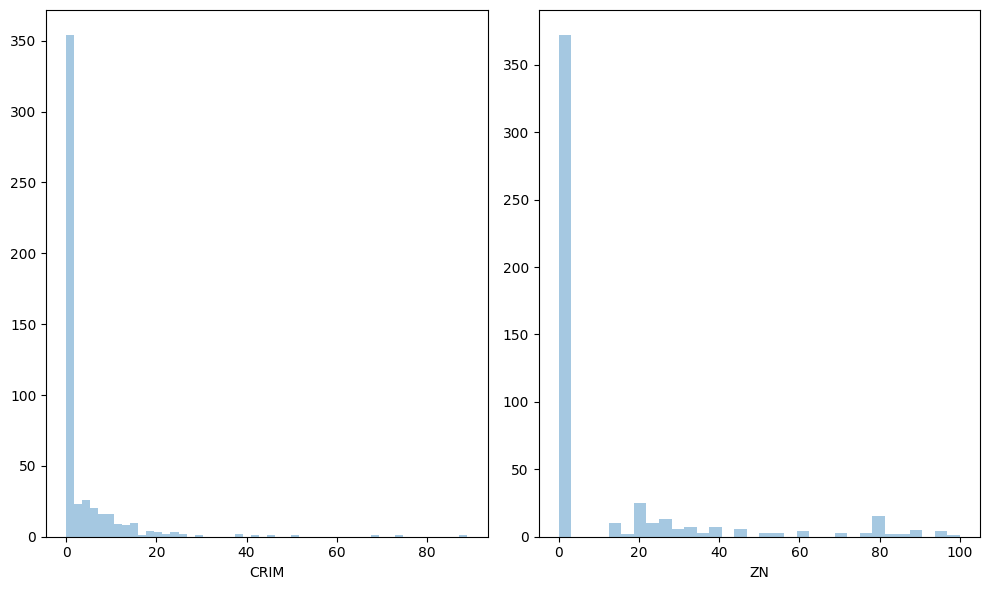

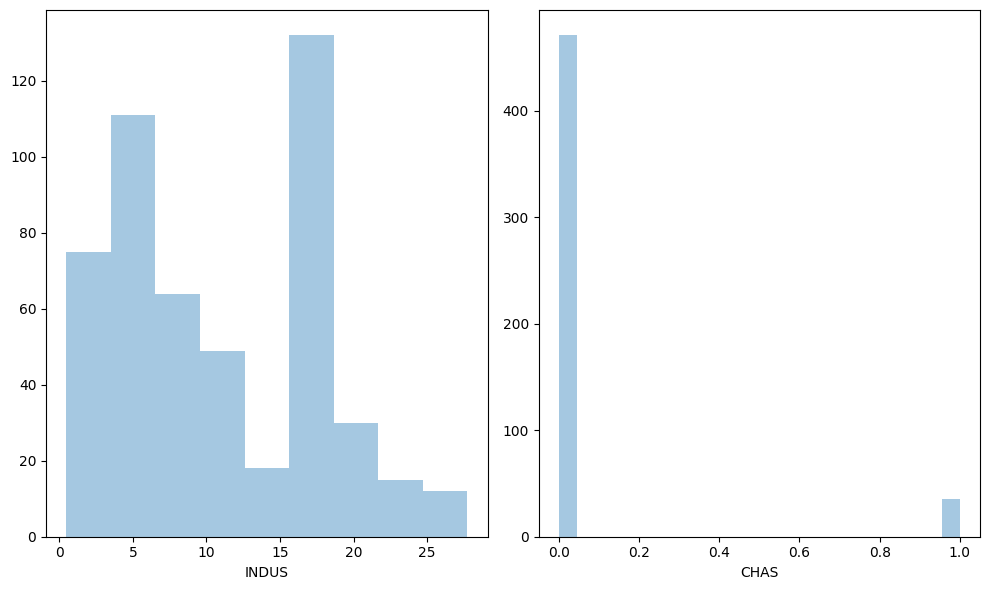

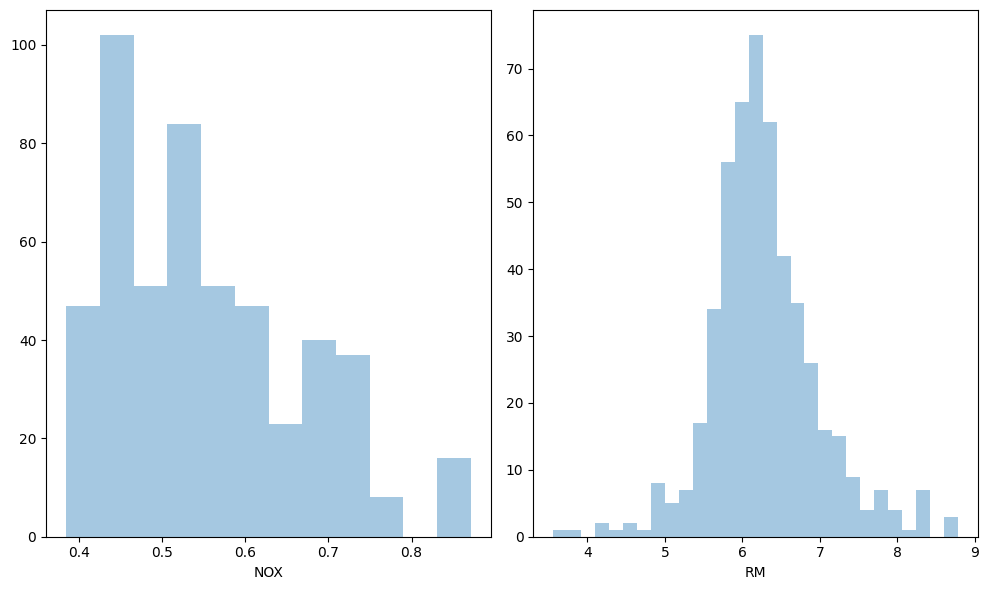

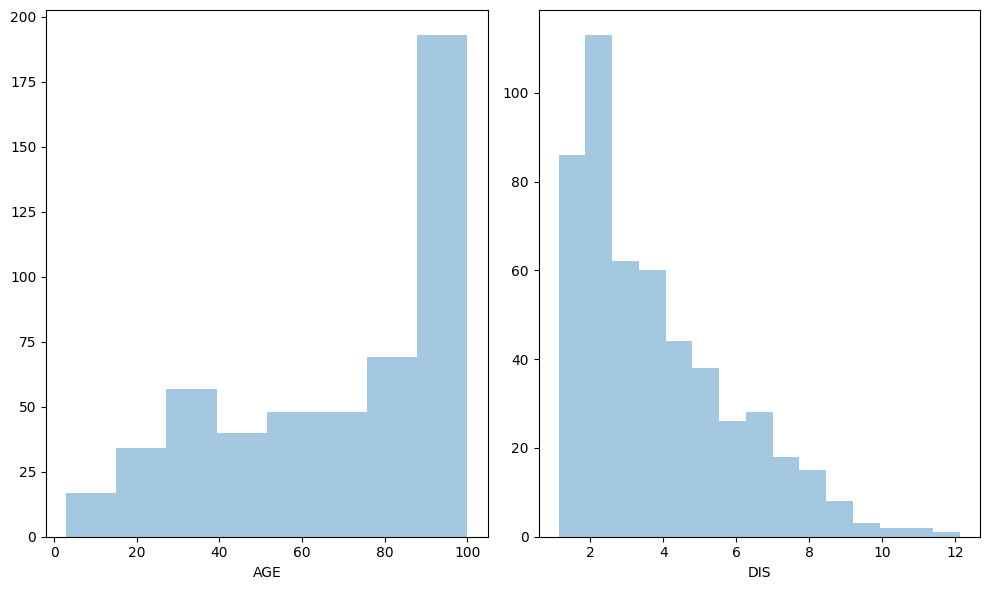

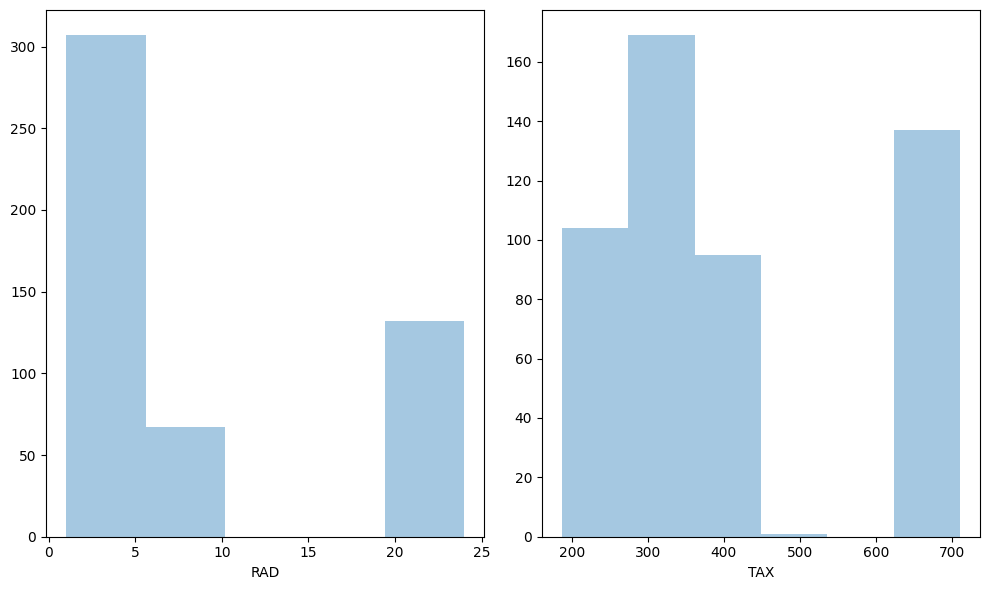

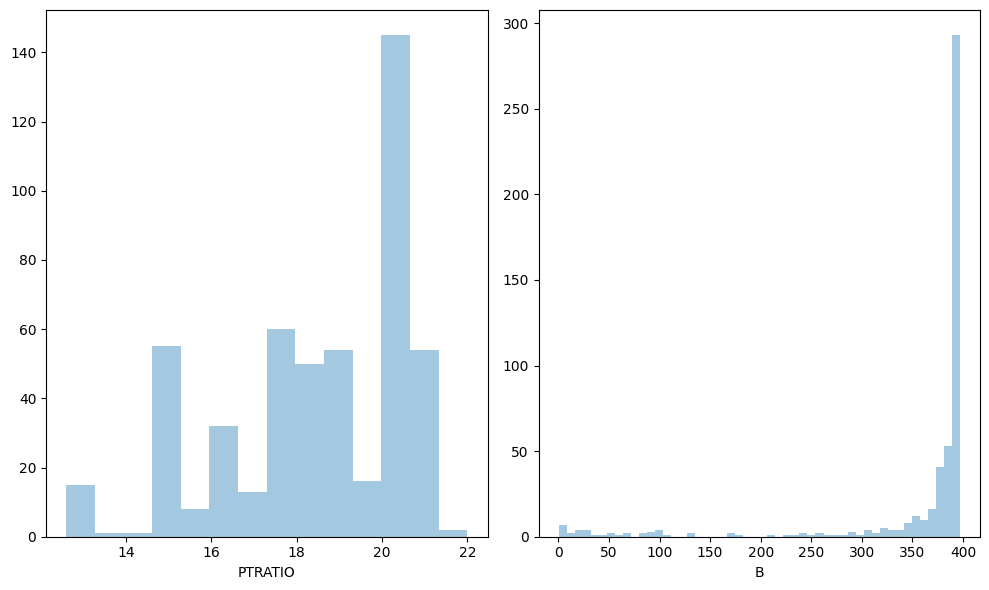

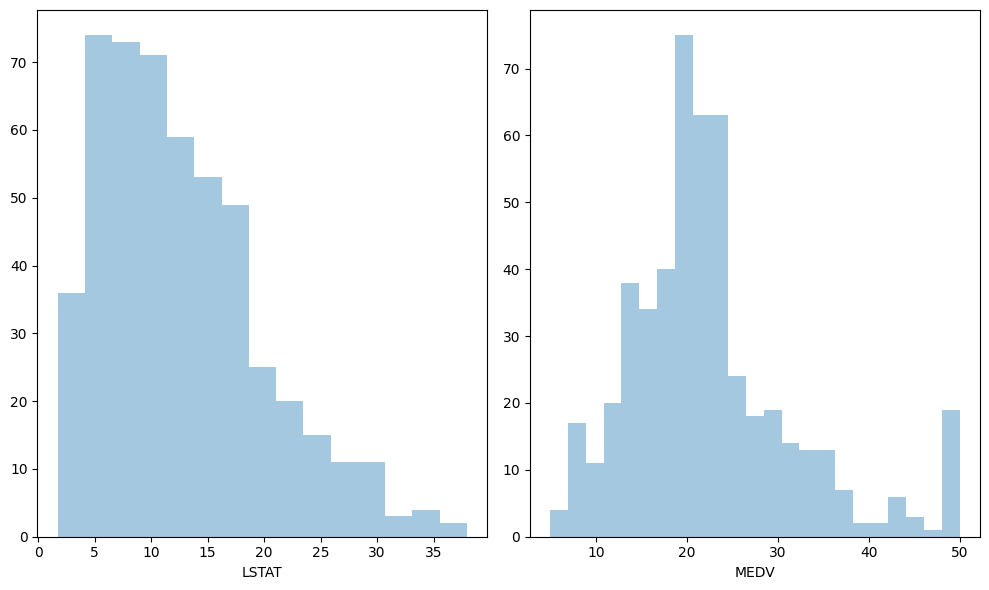


Box Plots



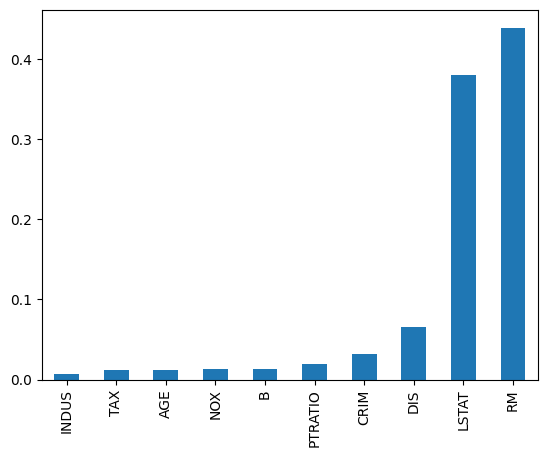

R^2:  0.6730236441893918
Adusted R^2:  0.6692760641801011
MAE:  3.803833021127894
MSE:  28.740086876072702
RMSE:  5.360978164110791
25.987942736755016


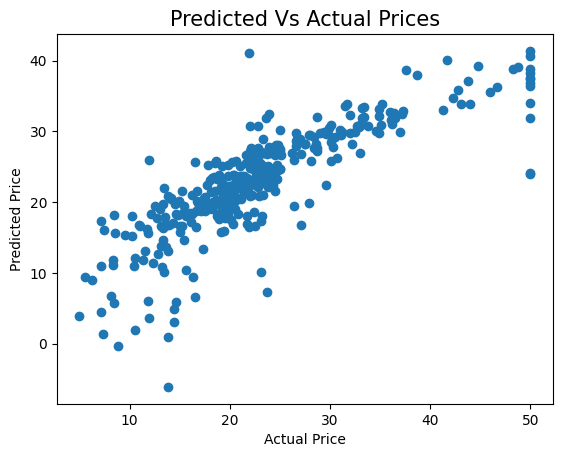

R^2:  0.6020443441695855
Adusted R^2:  0.5912156188408668
MAE:  4.036911293291297
MSE:  29.652907814664875
RMSE:  5.445448357542736
24.80697509949934


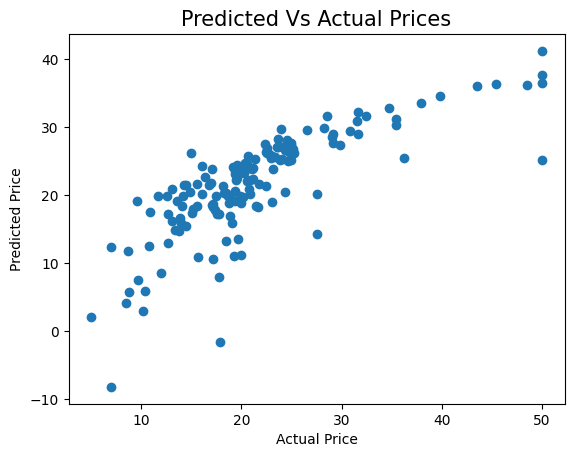

R^2:  0.9736872848744801
Adusted R^2:  0.973385706477626
MAE:  1.0000790960451975
MSE:  2.3127963389830475
RMSE:  1.5207880651106673

Maximum Error:  11.337999999999973


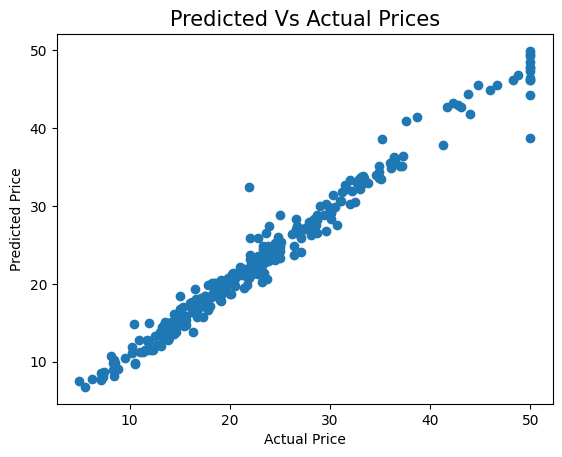

R^2:  0.8198335306515772
Adusted R^2:  0.8149310416897153
MAE:  2.3973223684210536
MSE:  13.424761348684214
RMSE:  3.6639816250472945

Maximum Error:  17.964


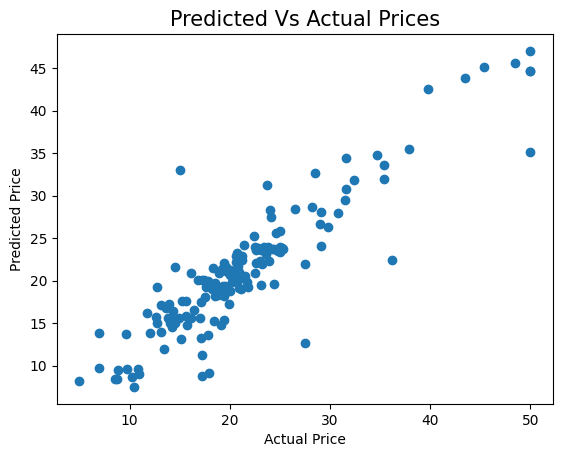

R^2:  0.722701203063395
Adusted R^2:  0.7195229933563853
MAE:  3.226497151263287
MSE:  24.373601861305925
RMSE:  4.936962817492748

Maximum Error:  27.646188499642385


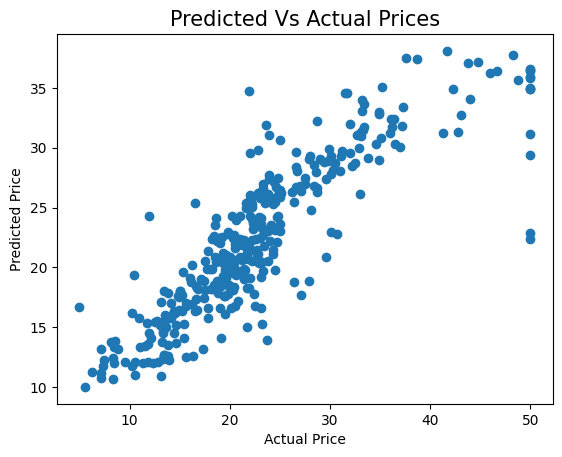

R^2:  0.7129704206936138
Adusted R^2:  0.7051600920050047
MAE:  3.18869836511908
MSE:  21.387462473661422
RMSE:  4.624658092622786

Maximum Error:  27.102599004315156


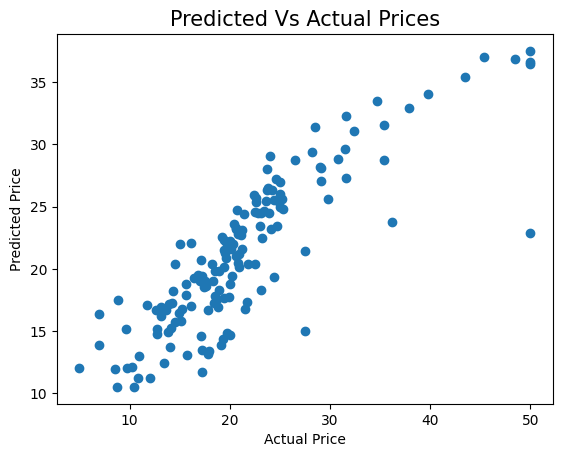

,Model,R_squared Score
1,Random Forest,81.983353
2,Support Vector Machine,71.297042
0,Linear Regression,60.204434


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import svm
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()
df.tail()
df.shape
df.isnull().sum()
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)
print("===="*20)
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)
def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,6))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]


print("Histograms\n")
plot_continuous_columns(df)

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(df)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()


rfc_feature_selection(x,y)
x.head(2)
x= x[['CRIM','DIS','RM','LSTAT']]
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x.head()
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})
coefficients
y_pred=lr.predict(xtrain)
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))
print(metrics.max_error(ytrain, y_pred))
plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))
x.head(2)
print(metrics.max_error(ytest, ytest_pred))
plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

rfr= RandomForestRegressor()

rfr.fit(xtrain, ytrain)
y_pred=rfr.predict(xtrain)
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))
plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
ytest_pred=rfr.predict(xtest)

rfr_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",rfr_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))
plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
svm_reg=svm.SVR()
svm_reg.fit(xtrain, ytrain)
y_pred=svm_reg.predict(xtrain)
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))
plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
ytest_pred=svm_reg.predict(xtest)

svm_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",svm_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))
plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()
models=pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'R_squared Score':[lin_acc*100, rfr_acc*100,svm_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)
